## RF linac example



In [1]:
from abel import *
import numpy as np
%load_ext autoreload
%autoreload 2

## Define the linac and beams

In [40]:
# define beam
source = SourceBasic()
source.charge = -8e-9 # [C] bunch charge (not train)
source.energy = 1e9 # [eV]
source.rel_energy_spread = 0.01
source.bunch_length = 300e-6 # [m]
source.emit_nx, source.emit_ny = 20e-6, 80e-6 # [m rad]
source.beta_x = 1
source.beta_y = source.beta_x
source.num_particles = 5000
source.num_bunches_in_train = 3200
source.bunch_separation = 4e-9
source.rep_rate_trains = 100

-- COSTS -----------------------------------------
-- Instrumented beamline (29%): 23 MILCU
-- RF structures (592x): 163 MILCU
-- Klystrons and modulators (593x, 17.0 kW avg per): 593 MILCU
--------------------------------------------------
-- Total: 0.78 BILCU
--------------------------------------------------
Tracked #0  SourceBasic             (s =    0.0 m) :   E =   1.0 GeV, Q = -8.00 nC, σz = 304.3 µm, σE =  1.0%, ε =  19.8/80.4 mm-mrad
    ... #1  RFAcceleratorCLICopti   (s = 2000.0 m) :   E =   7.0 GeV, Q = -8.00 nC, σz = 304.3 µm, σE =  0.1%, ε =  19.8/80.4 mm-mrad


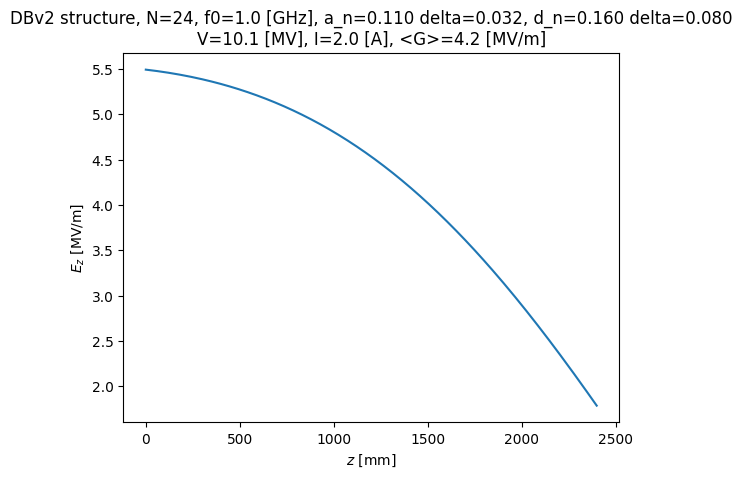

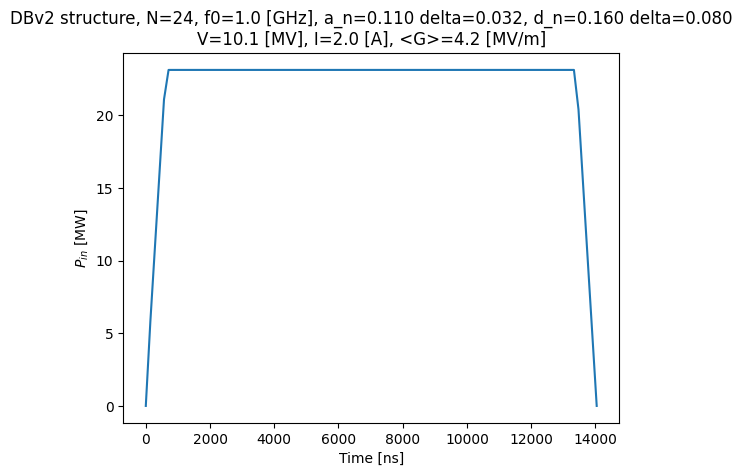

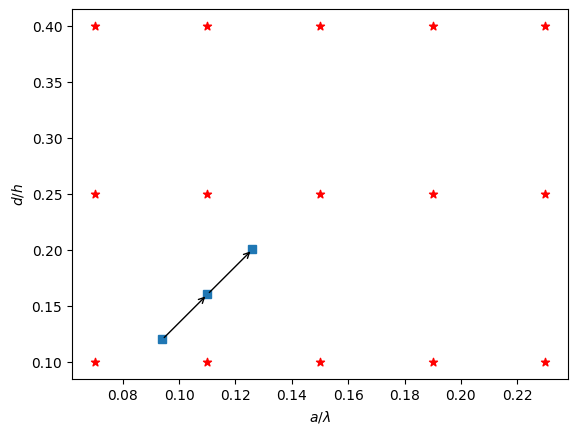

In [44]:
rf_accelerator = RFAcceleratorCLICopti()
rf_accelerator.rf_frequency = 1e9 # L-band
rf_accelerator.nom_energy_gain = 6e9
rf_accelerator.nom_accel_gradient = 3e6
rf_accelerator.rep_rate_trains = source.rep_rate_trains

rf_accelerator.track(source.track())

rf_accelerator.plot_gradient_profile()
rf_accelerator.plot_power_profile()
rf_accelerator.plot_database_points()
rf_accelerator.wallplug_power()
rf_accelerator.print_cost()

linac = ConventionalLinac()
linac.source = source
linac.rf_accelerator = rf_accelerator
linac.rep_rate_trains = source.rep_rate_trains
linac.num_bunches_in_train = source.num_bunches_in_train
linac.bunch_separation = source.bunch_separation
linac.run()

In [42]:
#Geometry only
print(f"Linac fill factor = {rf_accelerator.fill_factor}")
print(f"Structure filling time = {rf_accelerator.get_fill_time()*1e9:.1f} [ns]")

Linac fill factor = 0.71
Structure filling time = 606.9 [ns]


In [33]:
#Basic gradient/voltage information
#rf_accelerator.gradient_structure = 100e6 #It will figure out the voltages from the geometry
#rf_accelerator.track(source.track())
print(f"Total voltage = {rf_accelerator.nom_energy_gain/1e9:.1f} [GV], per structure = {rf_accelerator.voltage_structure/1e6:.1f} [MV]")

Total voltage = 10.0 [GV], per structure = 140.1 [MV]


In [34]:
print("Power per structure =", rf_accelerator.get_structure_power()/1e6, "[MW]")
print("Beam Pulse Length =", rf_accelerator.train_duration, "[ns]")
print("Total RF->beam Efficiency =", rf_accelerator.get_rf_efficiency()*100, "[%] (single bunch)")
print("Energy per structure =", rf_accelerator.get_structure_pulse_energy(), "[J]")
print("Max pulse length =", rf_accelerator.get_pulse_length_max()*1e9, "[ns] (beam current undefined)")
print("Max pulse length =", rf_accelerator.get_pulse_length_max()*1e9, "[ns] @ beam_current=",rf_accelerator.average_current_train, "[A]")

Power per structure = 2404.884009779737 [MW]
Beam Pulse Length = 3.199e-06 [ns]
Total RF->beam Efficiency = 38.99418042950366 [%] (single bunch)
Energy per structure = 9193.181194761879 [J]
Max pulse length = 3199.6340455362993 [ns] (beam current undefined)
Max pulse length = 3199.6340455362993 [ns] @ beam_current= 7.999999999999998 [A]


## Let's do some tracking - this changes the beam settings in the driverLinac object!

In [ ]:
beam.plot_lps()

print("Beam parameters in linac before tracking:",)
print(driverLinac)

beam2 = driverLinac.track(beam)
beam2.plot_lps()

print("Beam parameters in linac after tracking:",)
print(driverLinac)


In [ ]:
driverLinac.plot_gradient_profile()
plt.grid()

In [ ]:
driverLinac.plot_power_profile()
plt.grid()


## Gradient optimalization

We have now set the pulse length (from the train) and the total energy we want. What are the gradient we can achieve, and how long does the linac need to be?

In [ ]:
print(f"Max gradient at I_beam={driverLinac.average_current_train:.1f}[A], t_beam={driverLinac.train_duration*1e9:.1f}[ns]")
print(driverLinac)

#driverLinac._RF_structure.uselimit_PC = False

print("Current structure voltage  =", driverLinac.voltage_structure/1e6, "[MV] ->", driverLinac.gradient_structure/1e6, ", [MV/m] -> power/structure=", driverLinac.get_structure_power()/1e6, "[MW]")
print("Max structure voltage      =", driverLinac.get_structure_voltage_max()/1e6, "[MV]") #Max gradient at current pulse length and current
print("Max structure gradient     =", driverLinac.get_structure_voltage_max()/1e6/driverLinac.structure_length, "[MV/m]")
print("Max pulse length =", driverLinac.get_pulse_length_max()*1e9, "[ns]") #Max pulse length at current gradient and current
print( driverLinac._RF_structure.getMaxAllowableBeamTime_detailed(driverLinac.get_structure_power(), driverLinac.average_current_train))

In [ ]:

print("Fixing gradient and linac geometry")
print("optimizing...:", driverLinac.optimize_linac_geometry_and_gradient())
print(driverLinac)
print("Current structure voltage  =", driverLinac.voltage_structure/1e6, "[MV] ->", driverLinac.gradient_structure/1e6, ", [MV/m] -> power/structure=", driverLinac.get_structure_power()/1e6, "[MW]")
print("Max structure voltage      =", driverLinac.get_structure_voltage_max()/1e6, "[MV/m]") #Max gradient at current pulse length and current
print("Max structure gradient     =", driverLinac.get_structure_voltage_max()/1e6/driverLinac.structure_length, "[MV/m]")
print("Max pulse length           =", driverLinac.get_pulse_length_max()*1e9, "[ns]") #Max pulse length at current gradient and current
print( driverLinac._RF_structure.getMaxAllowableBeamTime_detailed(driverLinac.get_structure_power(), driverLinac.average_current_train)) 

# Exercising the RFAcceleratorBasic a bit

In [ ]:
basic = RFAcceleratorBasic(nom_energy_gain=1e9)
basic.num_structures = 100
basic.length=basic.num_structures*basic.structure_length/basic.autoOptimize_targetFillFactor
basic.track(beam,verbose=1)


# Basic test of SCRFAcceleratorBasic

In [ ]:
scrf = SCRFAcceleratorBasic(nom_energy_gain=500e6,rf_frequency=2e9, rep_rate_trains=10.0)
scrf.num_structures = 100
scrf.length=basic.num_structures*basic.structure_length/basic.autoOptimize_targetFillFactor
scrf.track(beam,verbose=1)